# Matplotlib and tidy data

### Handy hints 

* In general, we are using plotting libraries that return objects encapsulating the plot. You can check the type of these returned objects with `type()`. Jupyter's tools for exploring objects and methods will also be useful: the `?` and `??` operators, and tab autocompletion.

## Setup 

In [2]:
import pandas as pd
import numpy as np

In [5]:
# This causes Jupyter to display any matplotlib plots directly in the notebook
# It also works for seaborn, since seaborn uses matplotlib to render plots
# There is an alterative `%matplotlib notebook` magic for interactivity, which we won't use today
# - we will use other libraries for interactive plots
%matplotlib inline

In [6]:
# pyplot (as plt) is the module we'll primarily use to instantiate matplotlib plot objects
# We wouldn't usually need to import matplotlib itself, but we'll use it to explore the library
import matplotlib
from matplotlib import pyplot as plt

### Toy data 

Let's create a toy dataset to use for illustration and problem-posing purposes. It's very small, so you we can easily see what's going on. In most cases we'll ask you to do exercises using the more complex housing data.

In [17]:
from io import StringIO

data_string = """name	number	engine_type	colour	wheels	top_speed_mph	weight_tons
Thomas	1	Tank	Blue	6	40	52
Edward	2	Tender	Blue	14	70	41
Henry	3	Tender	Green	18	90	72.2
Gordon	4	Tender	Blue	18	100	91.35
James	5	Tender	Red	14	70	46
Percy	6	Tank	Green	4	40	22.85
Toby	7	Tank	Brown	6	20	27
Emily	12	Tender	Green	8	85	45
Rosie	37	Tank	Purple	6	65	37
Hiro	51	Tender	Black	20	55	76.8"""

trains = pd.read_table(StringIO(data_string))
trains['count'] = 1
trains['size'] = pd.cut(trains['weight_tons'], 3, labels=['Small','Medium','Big'])

trains

,name,number,engine_type,colour,wheels,top_speed_mph,weight_tons,count,size
0,Thomas,1,Tank,Blue,6,40,52.00,1,Medium
1,Edward,2,Tender,Blue,14,70,41.00,1,Small
2,Henry,3,Tender,Green,18,90,72.20,1,Big
3,Gordon,4,Tender,Blue,18,100,91.35,1,Big
4,James,5,Tender,Red,14,70,46.00,1,Medium
5,Percy,6,Tank,Green,4,40,22.85,1,Small
6,Toby,7,Tank,Brown,6,20,27.00,1,Small
7,Emily,12,Tender,Green,8,85,45.00,1,Small
8,Rosie,37,Tank,Purple,6,65,37.00,1,Small
9,Hiro,51,Tender,Black,20,55,76.80,1,Big


## Matplotlib intro: the pyplot interface 

Matplotlib comes with an interface of convenience functions, available under `pyplot`. It was originally designed to mimic MATLAB's plotting interface.

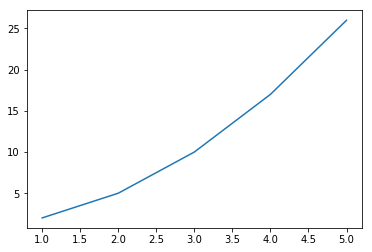

In [8]:
x = [1,2,3,4,5]
y = [2,5,10,17,26]

plt.plot(x,y)

`pyplot` has a concept of the "current" axes and figure, so you don't generally have to tell functions which plot to act on - they will automatically operate on the most-recent, currently open plot. This is often convenient, but sometimes too restrictive. 

In Jupyter, each input cell will create a new plot, and every command in the cell will operate on that plot:

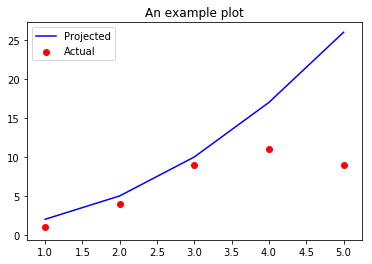

In [167]:
y2 = [1,4,9,11,9]

plt.plot(x, y, c='blue', label='Projected')
plt.scatter(x, y2, c='red', label='Actual')
plt.legend()
plt.title("An example plot")

It's very common to use Numpy arrays and Pandas Series with Matplotlib.

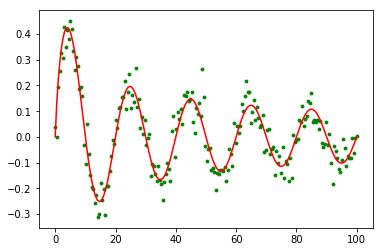

In [16]:
x = np.linspace(0, 100, 200)  # 200 points from 0 to 100
wavelength = 20
y = np.sin(2*np.pi*x/wavelength) * 1/np.sqrt(x+1)
y_noisy = y + 0.05*np.random.randn(len(y))

plt.plot(x, y, c='red')
plt.scatter(x, y_noisy, c='green', s=8)  # s sets size

**Exercise:** Using the toy `trains` dataset, create a scatter plot of `top_speed_mph` against   `wheels`.

In [175]:
# for reference: here's that dataset
trains

,name,number,engine_type,colour,wheels,top_speed_mph,count,size
0,Thomas,1,Tank,Blue,6,40,1,Small
1,Edward,2,Tender,Blue,14,70,1,Medium
2,Henry,3,Tender,Green,18,90,1,Big
3,Gordon,4,Tender,Blue,18,100,1,Big
4,James,5,Tender,Red,14,70,1,Medium
5,Percy,6,Tank,Green,4,40,1,Small
6,Toby,7,Tank,Brown,6,20,1,Small
7,Emily,12,Tender,Green,8,85,1,Small
8,Rosie,37,Tank,Purple,6,65,1,Small
9,Hiro,51,Tender,Black,20,55,1,Big


You can find a gallery of Matplotlib plot types at https://matplotlib.org/gallery.html.

Let's try a bar plot showing the average speed of tender engines vs tank engines. 

engine_type
Tank      41.250000
Tender    78.333333
Name: top_speed_mph, dtype: float64
engine_type
Tank      18.427787
Tender    16.329932
Name: top_speed_mph, dtype: float64


<Container object of 2 artists>

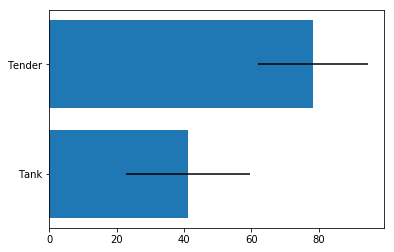

In [17]:
average_top_speeds = trains.groupby('engine_type')['top_speed_mph'].aggregate(np.mean)
speed_stderrs = trains.groupby('engine_type')['top_speed_mph'].aggregate(np.std)
print(average_top_speeds)
print(speed_stderrs)

# this is a horizontal bar plot; plt.bar would give a vertical plot
plt.barh(bottom=[0,1], width=average_top_speeds, xerr=speed_stderrs, 
         tick_label=average_top_speeds.index)

Notice that Matplotlib bar plots expect us to input the length of the bars directly, so we needed to calculate these averages using Pandas.

A [boxplot](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.boxplot.html) is actually a little easier in terms of summary statistics: we provide a list of arrays/series/lists, each one of which is the set of datapoints for one box. Here's some data transformed with Pandas to use:

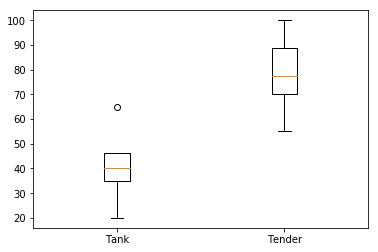

In [31]:
data = [series for (groupname, series) in list(trains.groupby('engine_type')['top_speed_mph'])]
label_names = [groupname for (groupname, series) in list(trains.groupby('engine_type')['top_speed_mph'])]

g = plt.boxplot(x=data, labels=label_names)

## Interlude: tidy data 

The dataset below is a spoiler! Before looking at it, do the "tidy data" exercise in the workshop.

## Housing data 

Let's read in the data we will use for the rest of the workshop. This is house sales data from Seattle in 2014-2015. To simplify things, we'll read in only the fields we'll use, but you can read in the rest of the fields to play later if you want more variables.

First, a quick look at the raw data:

In [34]:
!head -n 3 housing-data-10000.csv

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
1446800660,2015-03-16,276500.0,4,1.75,1400,6650,1.5,0,0,4,6,1400,0,1942,0,98168,47.4888,-122.33200000000001
1453601502,2015-02-26,303697.0,4,2.0,2520,7334,1.0,0,0,3,7,1600,920,1955,0,98125,47.7263,-122.291


This data is pretty tidy already. We have one sale per row, one column per variable, and just one table of observations.

In [4]:
sales = pd.read_csv("housing-data-10000.csv", 
                    usecols=['id','date','price','zipcode','lat','long',
                             'waterfront','view','grade','sqft_living','sqft_lot'],
                    parse_dates=['date'], 
                    dtype={'zipcode': 'category',
                           'waterfront': 'bool'})

# We'll add a count column that is just 1 for every sale - convenient for aggregating sale counts later
sales['count'] = 1

In [3]:
sales.head()

,id,date,price,sqft_living,sqft_lot,waterfront,view,grade,zipcode,lat,long,count
0,7129300520,2014-10-13,221900.0,1180,5650,False,0,7,98178,47.5112,-122.257,1
1,6414100192,2014-12-09,538000.0,2570,7242,False,0,7,98125,47.7210,-122.319,1
2,5631500400,2015-02-25,180000.0,770,10000,False,0,6,98028,47.7379,-122.233,1
3,2487200875,2014-12-09,604000.0,1960,5000,False,0,7,98136,47.5208,-122.393,1
4,1954400510,2015-02-18,510000.0,1680,8080,False,0,8,98074,47.6168,-122.045,1


In [8]:
sales.dtypes

id                      int64
date           datetime64[ns]
price                 float64
sqft_living             int64
sqft_lot                int64
waterfront               bool
view                    int64
grade                   int64
zipcode              category
lat                   float64
long                  float64
count                   int64
dtype: object

TODO: worth adding? read in yr_renovated and fix missing values

TODO: read in wide form data and optionally unstack it?

Note that as well as specifying that the `date` field should be parsed as a date, we specified that certain variables are categorical (as opposed to integers). Some plotting commands understand pandas DataFrames and will treat categorical variables differently to numerical variables.

## Matplotlib  

### Figures and Axes 

Under the hood, Matplotlib is an object-oriented library. I recommend using the object-oriented interface directly rather than the pyplot interface, for full control over your plots. 

Libraries built on Matplotlib can also return Matplotlib objects - we'll see this later with Seaborn. Understanding a bit of the structure of Matplotlib objects will let you tweak your Seaborn plots.

Here's how to make the plot we made above, using method calls instead of the shortcut `plt.scatter`:

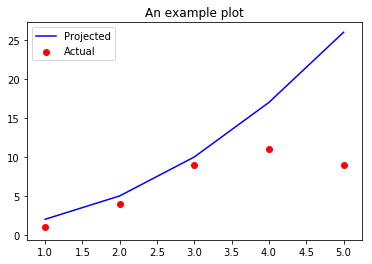

In [42]:
# we could be even more explicit here and instead use
# fig = plt.figure()
# ax = fig.add_subplot()
fig, ax = plt.subplots()

x = [1,2,3,4,5]
y = [2,5,10,17,26]
y2 = [1,4,9,11,9]

ax.plot(x, y, c='blue', label='Projected')
ax.scatter(x, y2, c='red', label='Actual')
ax.legend()
ax.set_title("An example plot")

Let's look at the objects we created in the first step:

In [29]:
type(fig), type(ax)

(matplotlib.figure.Figure, matplotlib.axes._subplots.AxesSubplot)

Here, `fig` is a Matplotlib `Figure` class instance representing the figure we've drawn. The `Axes` are a property of the figure. So, we still have access to our plot, and can display and modify it.

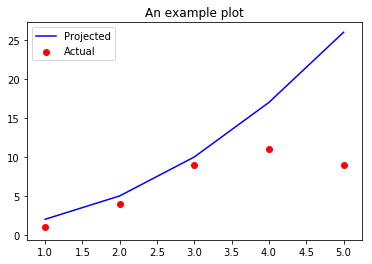

In [43]:
fig

In [35]:
fig.axes

In [44]:
the_same_axes_as_before = fig.axes[0]

the_same_axes_as_before.annotate("where it all went wrong", 
                                 xy=(3,10), xytext=(1,12),
                                 arrowprops={'width':2})

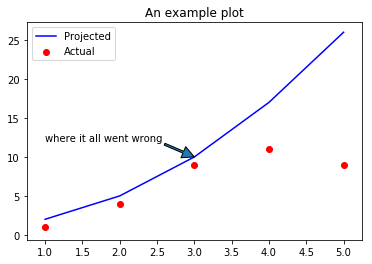

In [45]:
fig

`ax` is a Matplotlib `Axes` class instance. It represents an area of a figure with coordinates, on which we can plot. You can see that most of our plotting methods are actually methods of the `Axes` class, e.g. `Axes.scatter()`, and they add plot elements to the axes they're called on. `plt.scatter()` is just a wrapper around `Axes.scatter()`. Try running `??plt.scatter` to see the source code of this wrapper.

If you've been working in the pyplot interface and need to retrieve the currently-active Figure or Axes objects, you can use the `plt.gcf()` (get current figure) and `plt.gca()` (get current axes) functions.

**Exercise:** Create a scatter plot of house sales, using the latitude as the y-coordinate, and the longitude as the x-coordinate. Try to use object-oriented method calls for everything except creating the initial object(s). Give your figure a title, like "House sales in Seattle".

### Subplots 

A figure can have more than one set of axes, and we can easily create a figure with column, row or grid of subplots, and get back an array of Axes objects.

`Figure.add_subplot(nrows, ncols, n)` will create a grid of `nrows x ncols` subplots, and return the nth axes object from the list. `plt.subplot()` is a wrapper around this method.

`plt.subplots(nrows, ncols)` will create a new Figure object and then add a grid of subplots, and return a tuple of the Figure and the array of all Axes. It's a commonly-used utility function. You will often see it used even when we only want a single plot on our figure, as we did above.

Extra arguments to `plt.subplots()` are passed through to the `plt.figure()` call, so we can specify e.g. the figure size this way.

The shape of the axes array is  (2,)


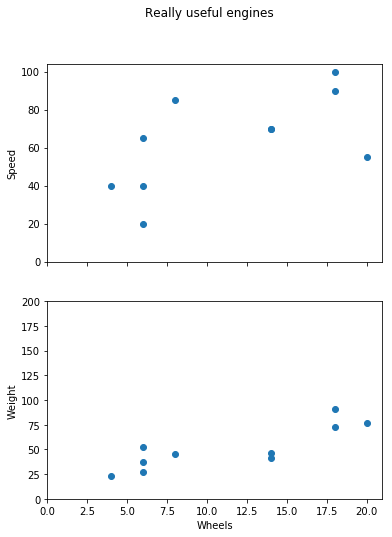

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(6,8))

print("The shape of the axes array is ",axes.shape)

axes[0].scatter(x=trains['wheels'], y=trains['top_speed_mph'])
axes[0].set_ylabel("Speed")

axes[1].scatter(x=trains['wheels'], y=trains['weight_tons'])
axes[1].set_ylabel("Weight")
axes[1].set_xlabel("Wheels")

# This sets the minimum of the x-axis to zero, and leaves the maximum to auto
# It affects both subplots since we set sharex=True
axes[0].set_xlim(0,None)

# This sets the y-axis, but each call only affects one subplot
# Set max weight to 200 just to illustrate
axes[0].set_ylim(0,None)
axes[1].set_ylim(0,200)

# Add a title to the entire figure, not one of the axes
fig.suptitle("Really useful engines")

NB: the `matplotlib.gridspec.GridSpec` class can be used to make more complicated layouts of subplots. We won't use this today.

**Exercise:** a subplot

### Styles

Matplotlib now has style sheets and context managers, which allow you to change the parameters for a plot. Context managers have an effect within the scope of a `with` block. For instance:

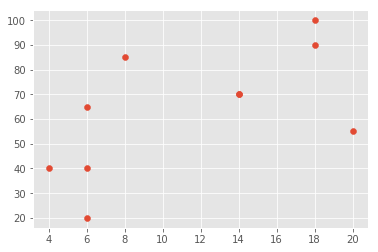

In [40]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots()
    ax.scatter(x=trains['wheels'], y=trains['top_speed_mph'])

A few example style sheets are:

- default : the Matplotlib 2 default
- ggplot : like R's ggplot
- seaborn : like Seaborn
- classic : what Matplotlib looked like once apon a time
- grayscale

Styles can be set permanently, instead of in a context, using `plt.style.use()`. 

Stylesheets are essentially sets of parameters, and you can define your own. You can find out more about the `style` package [here](https://matplotlib.org/users/style_sheets.html). 


### Colours 

Matplotlib has a good range of colours. We'll look a bit at colour functionality, and there are some more convenience functions when we get up to Seaborn.

Colours can be specified by name (e.g. "red", "blue", "palegoldenrod"....) - a list of named colours is [here](https://matplotlib.org/examples/color/named_colors.html)

Colours can be specified by RGB or RGBA value, as hex (e.g. "#ffffa0" or "#ffffa088") or as tuples, e.g. (1,1,0.6) or (1,1,0.6,0.5).

_Colormaps_ map continuous variables to colours. This is done by normalising the variable into the [0,1] range, then mapping this to a defined range of colours. The `plt.cm` module contains built-in colourmaps, and these can also be retrieved with `plt.get_cmap(name)`.

There's some Matplotlib documentation on [Choosing Colormaps](https://matplotlib.org/users/colormaps.html), which illustrates available built-in colormaps.

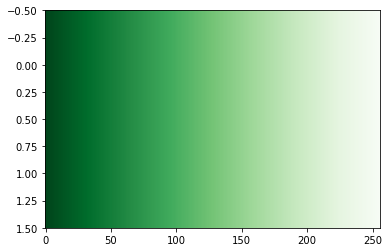

In [60]:
# Show the plt.cm.Greens_r colormap. Replace with other colormaps to see them. 
# Greens_r is a sequential colormap of greens of differing intensities
# _r means it is reversed

colourmap = plt.get_cmap("Greens_r")

fix, ax = plt.subplots()

# Make an image which is two rows of points with a gradient from 0 to 1
gradient = np.linspace(0, 1, 256)
image = np.vstack([gradient, gradient])

ax.imshow(image, aspect='auto', cmap=colourmap)


In [52]:
?np.vstack((gradient, gradient))

TODO: colour sales scatter by waterfront (traces), price (colourmap)